In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage



In [42]:
wine =pd.read_csv('/content/wine.csv')
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
wine.shape

(178, 14)

In [5]:
wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [6]:
wine.isnull().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [7]:
wine = wine.iloc[:,1:]
wine.head()

,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


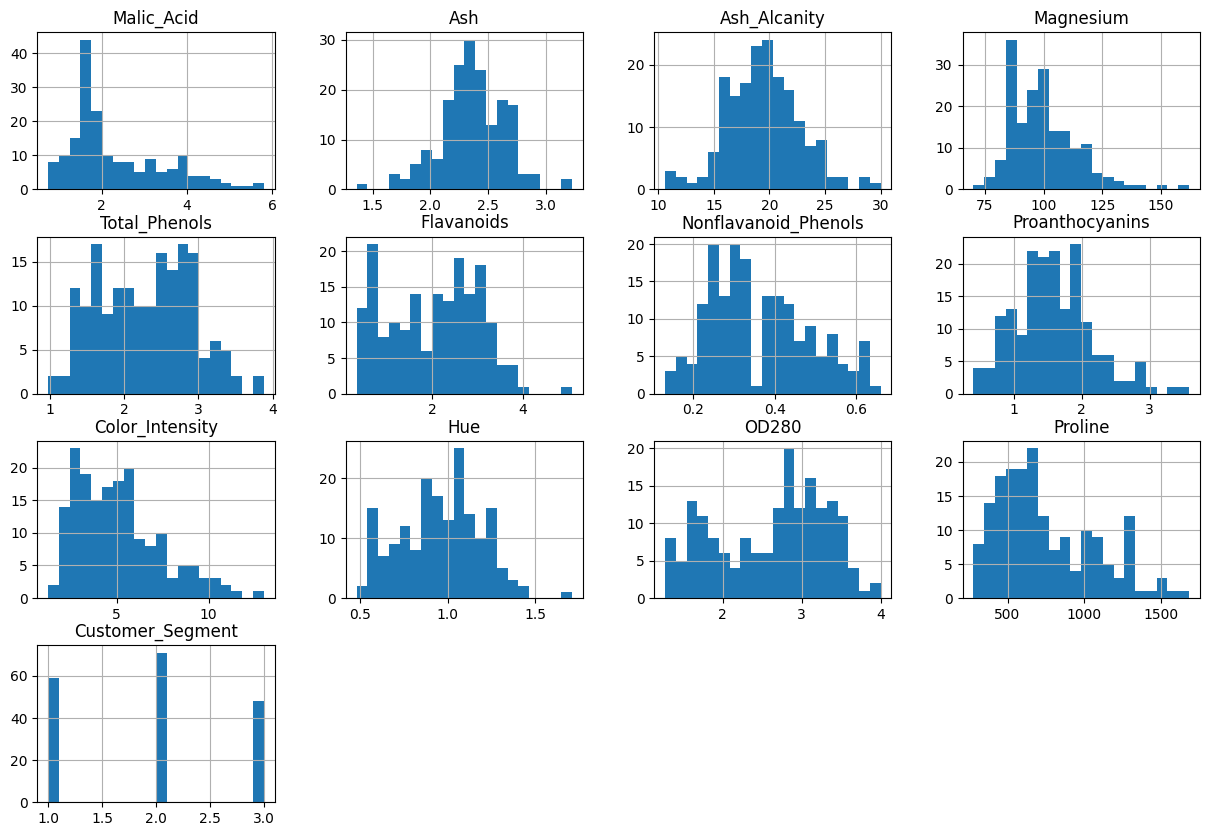

In [9]:
#  Distribution of features using histograms, box plots, or density plots
wine.hist(bins=20, figsize=(15, 10))
plt.show()


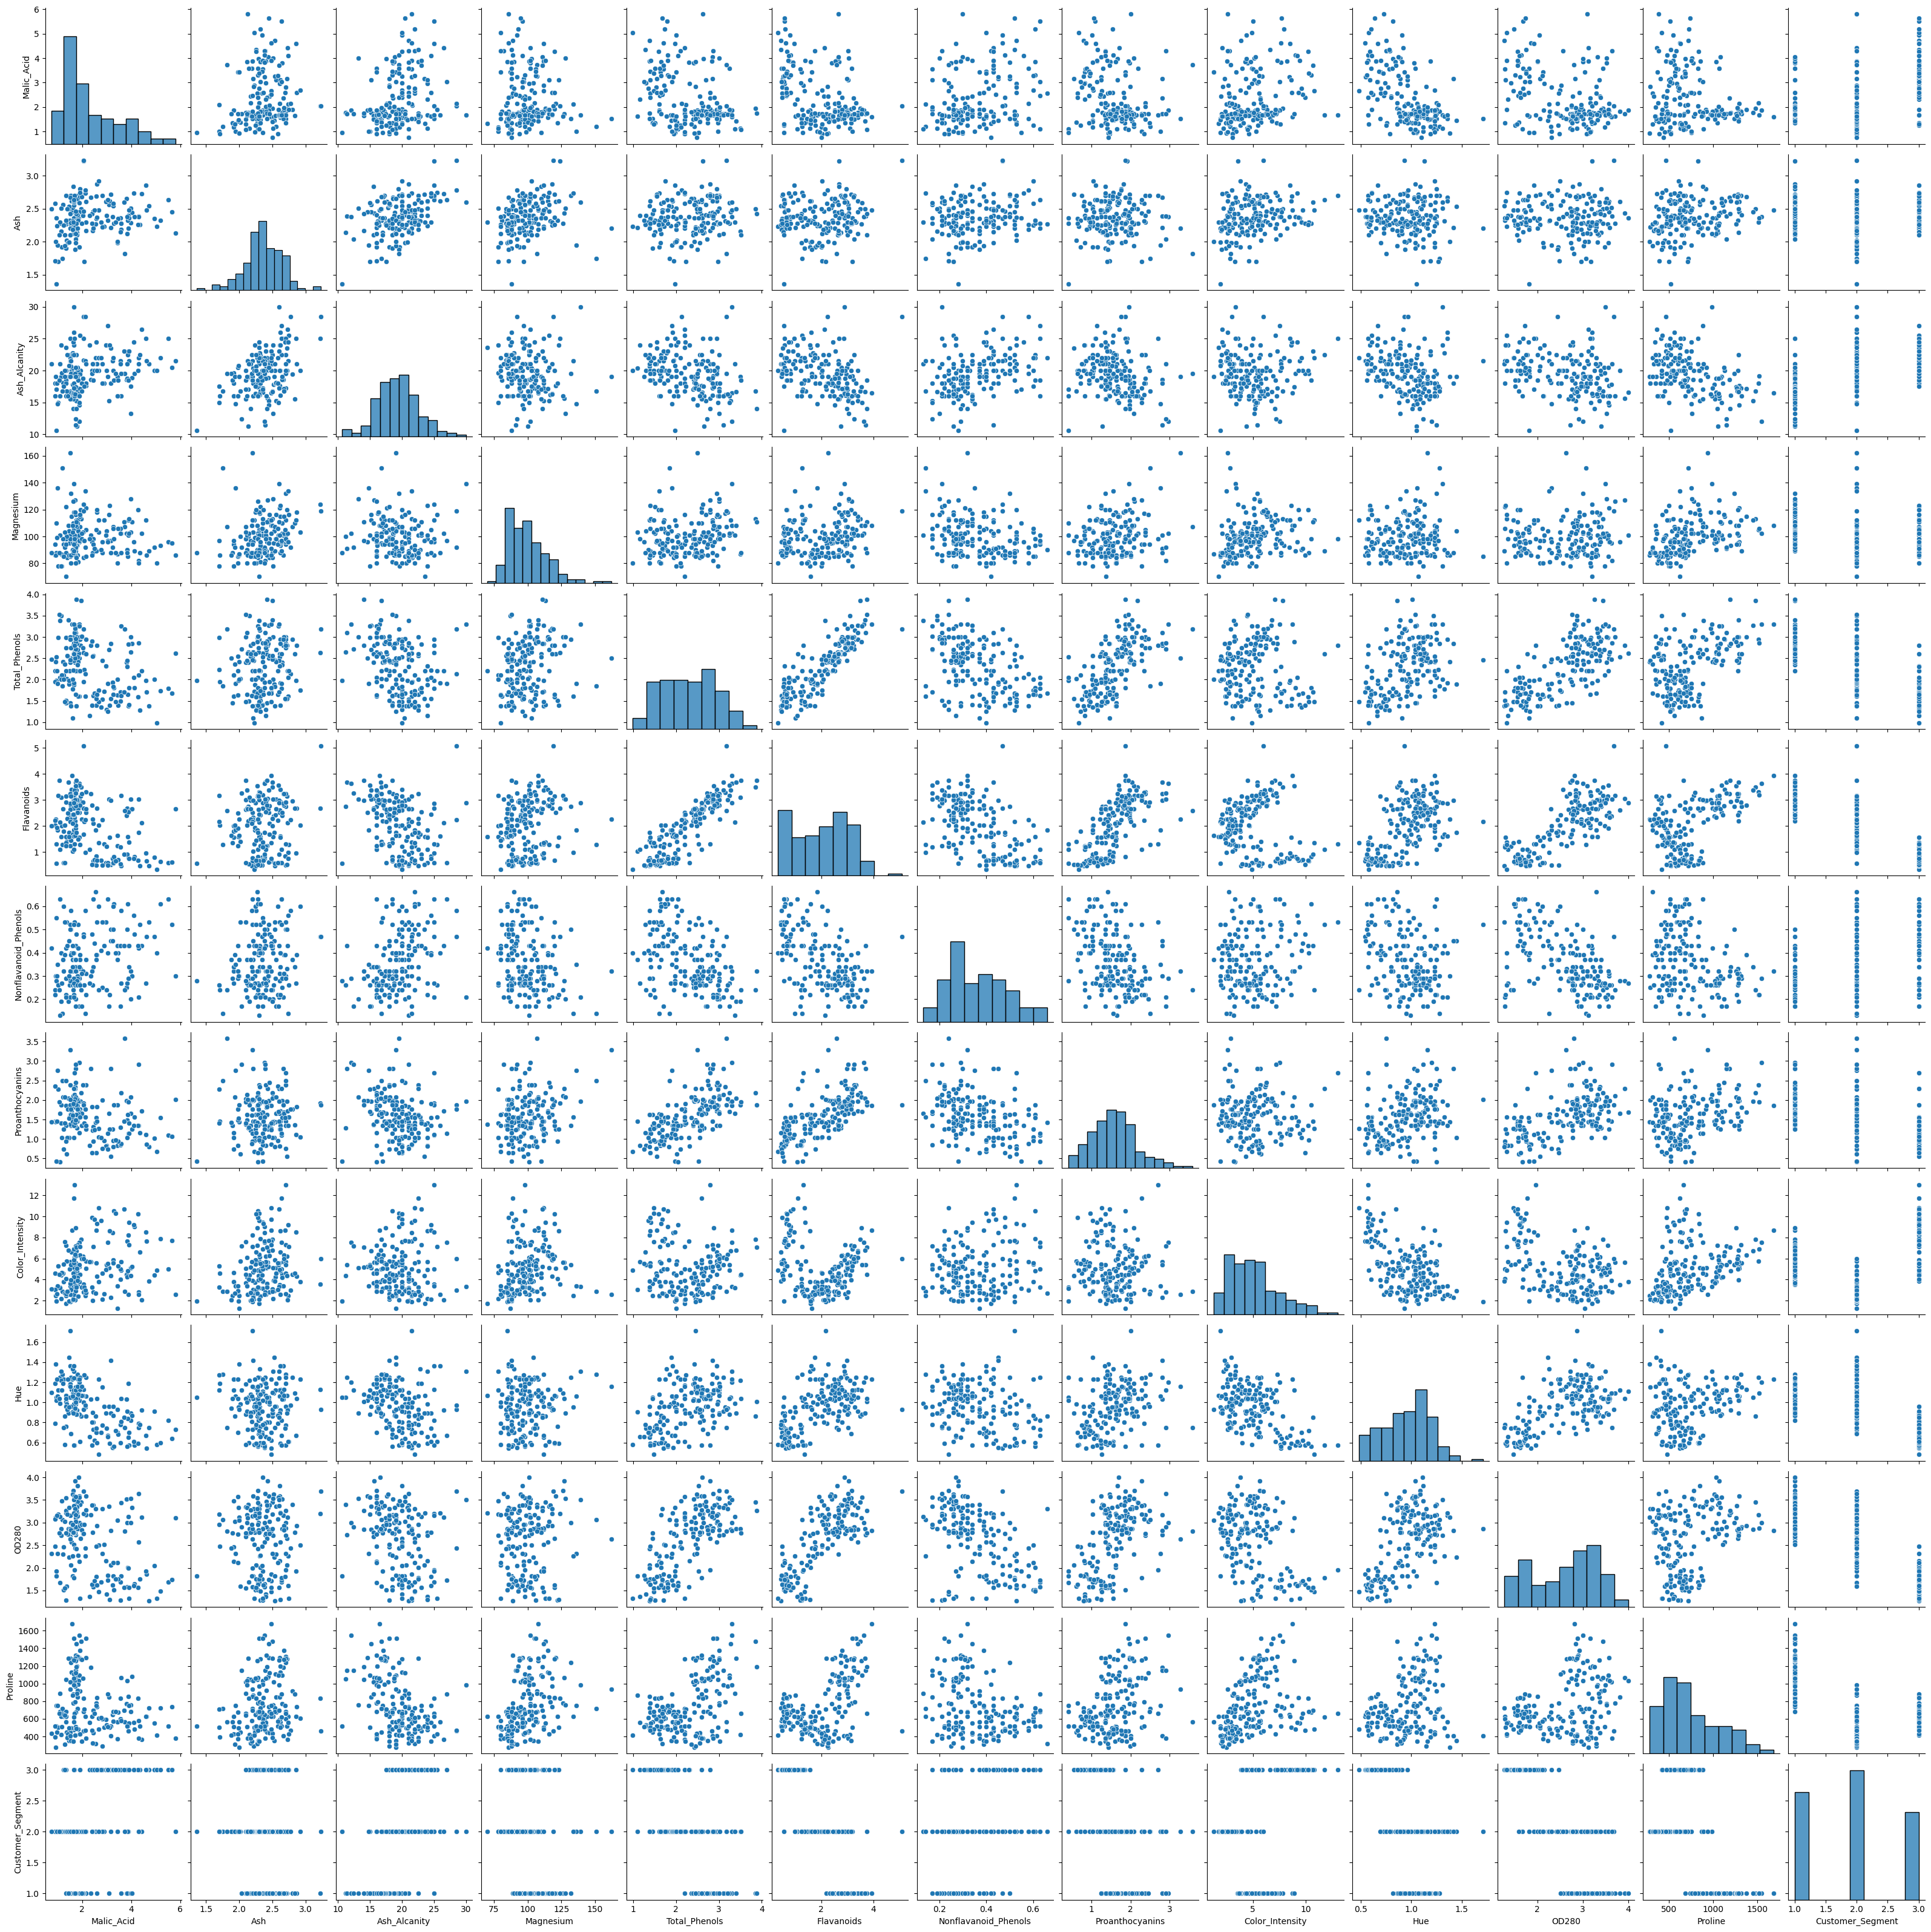

In [10]:
sns.pairplot(wine)
plt.show()


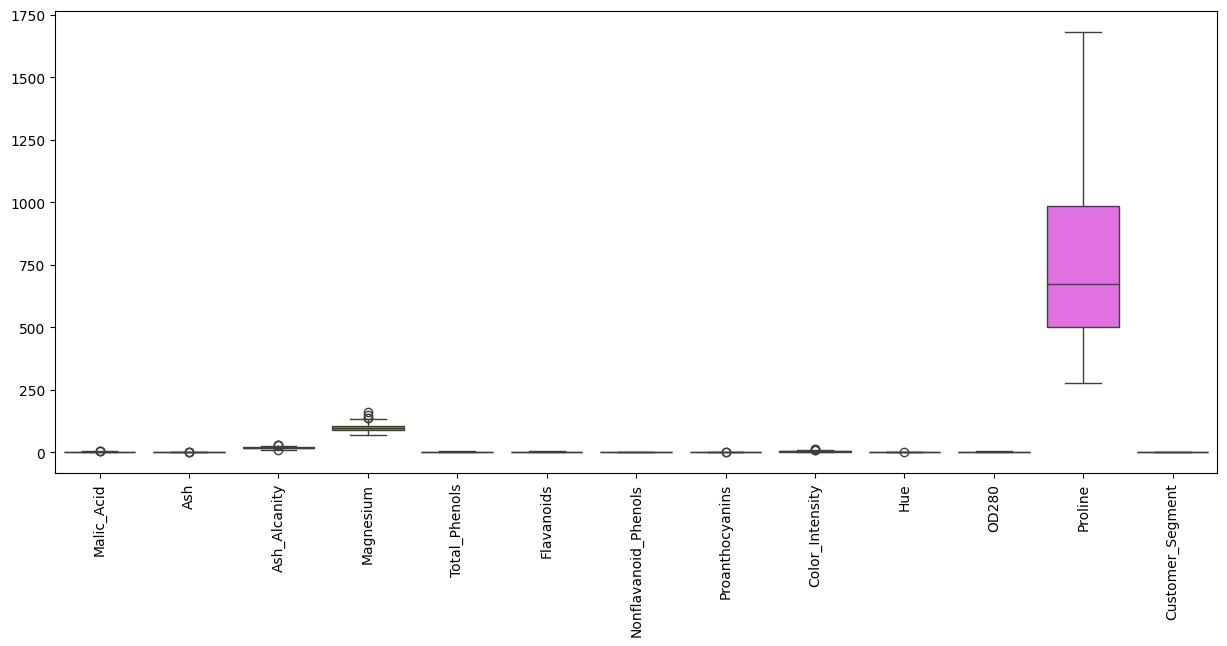

In [11]:
# Box plots for feature distributions
plt.figure(figsize=(15, 6))
sns.boxplot(data=wine)
plt.xticks(rotation=90)
plt.show()

(array([[178.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [178.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [178.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [178.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [178.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [178.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [178.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [178.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [178.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [178.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [178.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   5.,  41.,  43.,  31.,  15.,  20.,  16.,   4.,   3.],
        [178.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([1.300000e-01, 1.681170e+02, 3.361040e+02, 5.040910e+02,
        6.720780e+02, 8.

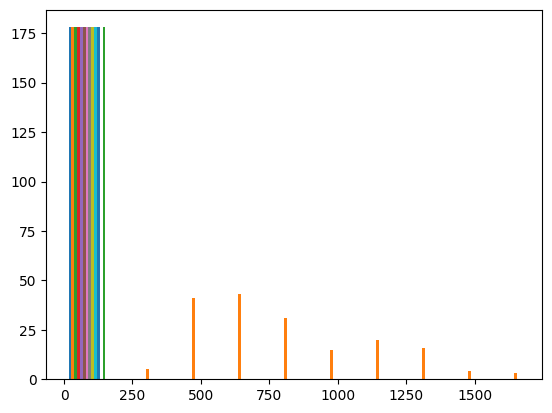

In [14]:
plt.hist(wine)

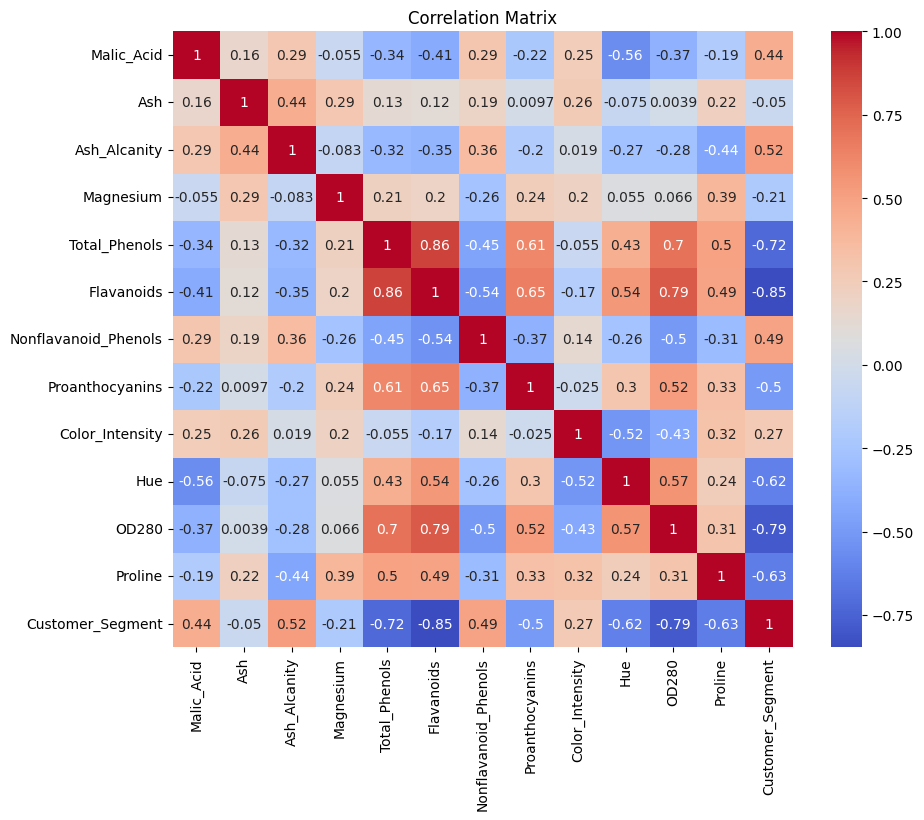

In [13]:
#  Correlation matrix
corr_matrix = wine.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [15]:
# Standardize the data (mean=0, std=1)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(wine)

In [16]:
# Apply PCA
pca = PCA()
pca.fit(data_scaled)

PCA()

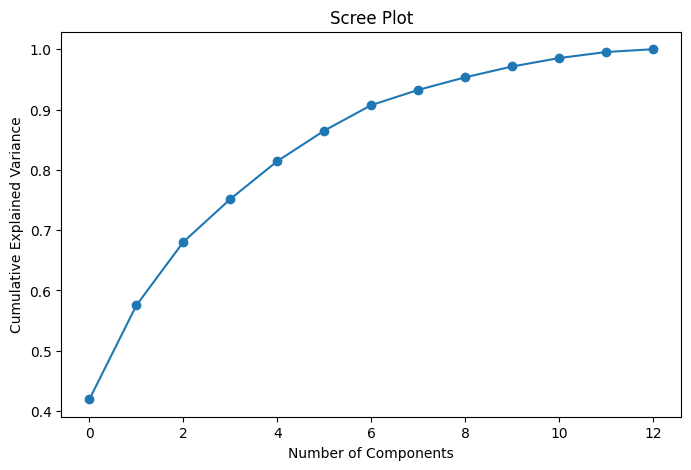

In [17]:

# Scree plot to determine optimal number of components
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()


In [18]:
# Number of components that explain 90% variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance >= 0.9) + 1
print(f'Number of components that explain 90% variance: {n_components}')


Number of components that explain 90% variance: 7


In [21]:
# Transform the original dataset into principal components
pca = PCA(n_components=n_components)
wine_pca = pca.fit_transform(data_scaled)


In [28]:
f"Original shape: {data_scaled.shape}"

'Original shape: (178, 13)'

In [29]:
f"Transformed shape: {data_pca.shape}"

'Transformed shape: (178, 9)'

In [43]:
#  Apply K-means to the original dataset
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_orig = kmeans.fit_predict(data_scaled)


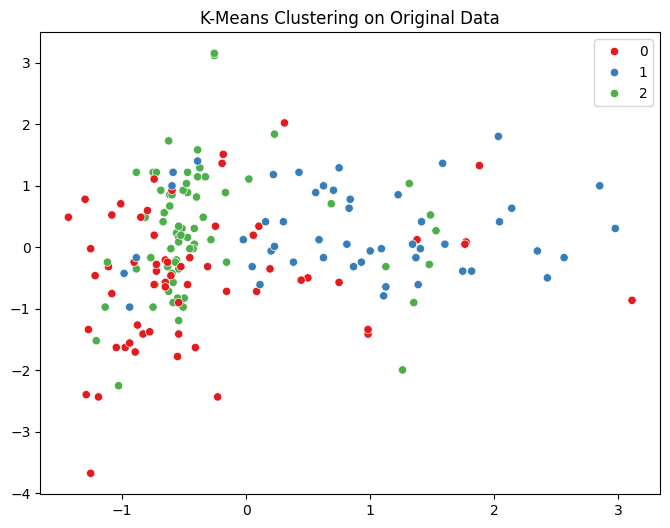

In [44]:
#  Visualize the clustering results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=clusters_orig, palette='Set1')
plt.title('K-Means Clustering on Original Data')
plt.show()

In [45]:
#  Evaluate clustering performance
silhouette_orig = silhouette_score(data_scaled, clusters_orig)
davies_bouldin_orig = davies_bouldin_score(data_scaled, clusters_orig)
print(f'Silhouette Score (Original Data): {silhouette_orig}')
print(f'Davies-Bouldin Index (Original Data): {davies_bouldin_orig}')


Silhouette Score (Original Data): 0.28628258889905817
Davies-Bouldin Index (Original Data): 1.3887535221193363


In [30]:
 # Apply K-means to the PCA-transformed dataset
clusters_pca = kmeans.fit_predict(data_pca)


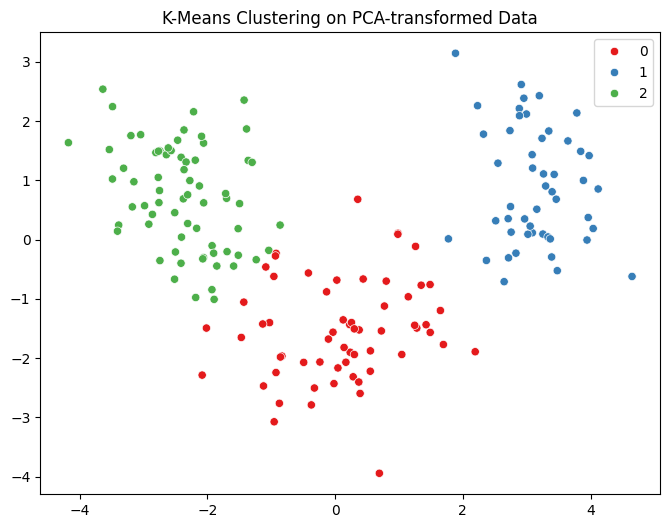

In [32]:

#  Visualize the clustering results from PCA-transformed data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=clusters_pca, palette='Set1')
plt.title('K-Means Clustering on PCA-transformed Data')
plt.show()

In [34]:
# Evaluate clustering performance
silhouette_pca = silhouette_score(data_pca, clusters_pca)
davies_bouldin_pca = davies_bouldin_score(data_pca, clusters_pca)
print(f'Silhouette Score (PCA Data): {silhouette_pca}')
print(f'Davies-Bouldin Index (PCA Data): {davies_bouldin_pca}')

Silhouette Score (PCA Data): 0.3041443381836874
Davies-Bouldin Index (PCA Data): 1.3193605542400946


In [ ]:
# Task : Hierarchical Clustering and Dendrogram

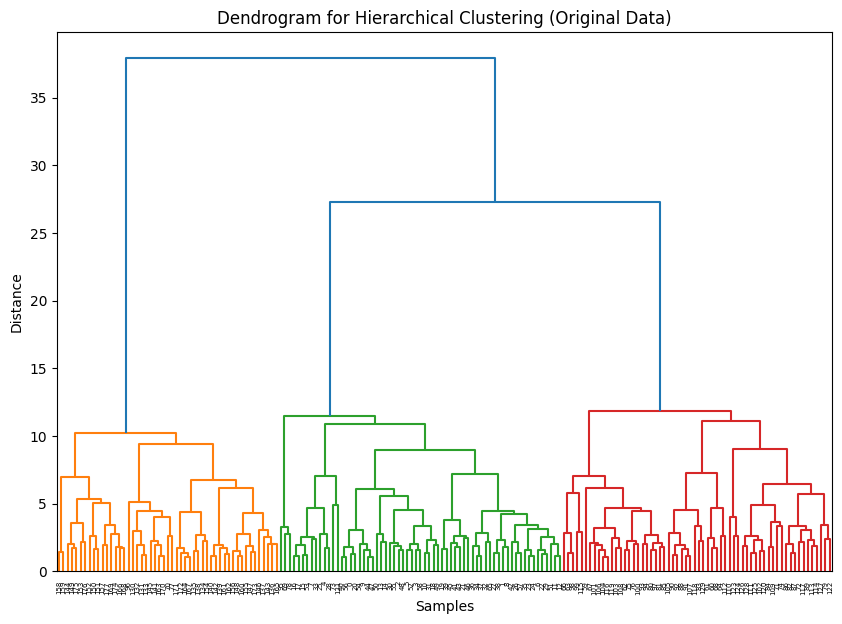

In [35]:
# Apply hierarchical clustering on the original data
Z = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering (Original Data)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

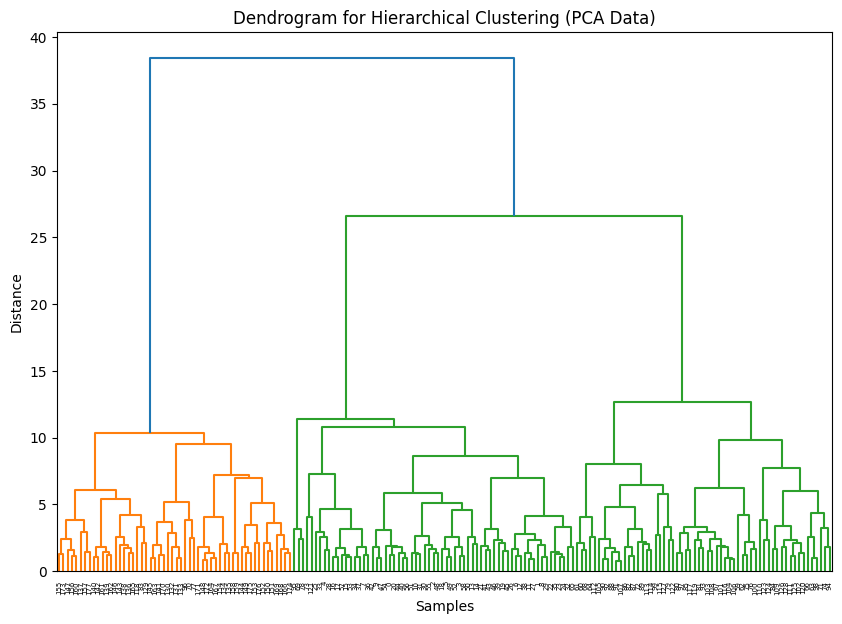

In [36]:
# Apply hierarchical clustering on PCA-transformed data
Z_pca = linkage(data_pca, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z_pca)
plt.title('Dendrogram for Hierarchical Clustering (PCA Data)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Task : Comparison and Analysis

In [37]:
#  Compare clustering results from original and PCA-transformed data
print(f"Silhouette Score Comparison: Original Data = {silhouette_orig}, PCA Data = {silhouette_pca}")
print(f"Davies-Bouldin Index Comparison: Original Data = {davies_bouldin_orig}, PCA Data = {davies_bouldin_pca}")


Silhouette Score Comparison: Original Data = 0.28628258889905817, PCA Data = 0.3041443381836874
Davies-Bouldin Index Comparison: Original Data = 1.3887535221193363, PCA Data = 1.3193605542400946


In [38]:
# Discuss similarities and differences in clustering results
if silhouette_pca > silhouette_orig:
    print("Clustering performance improved after PCA.")
else:
    print("Clustering performance is better on original data.")


Clustering performance improved after PCA.


In [39]:
#  Reflect on the impact of PCA on clustering performance
print("PCA helps reduce dimensionality and noise, which can lead to better clustering performance.")


PCA helps reduce dimensionality and noise, which can lead to better clustering performance.


In [40]:
# Task : Conclusion and Insights

#  Summarize key findings
print("Key Findings: PCA reduced dimensionality and retained most of the variance in the data, improving clustering performance.")

#  Discuss practical implications
print("Practical Implications: PCA simplifies high-dimensional datasets and enhances computational efficiency in clustering.")

#  Recommendations
print("Recommendation: Use PCA when high dimensionality negatively impacts clustering performance or computational resources.")


Key Findings: PCA reduced dimensionality and retained most of the variance in the data, improving clustering performance.
Practical Implications: PCA simplifies high-dimensional datasets and enhances computational efficiency in clustering.
Recommendation: Use PCA when high dimensionality negatively impacts clustering performance or computational resources.
